In [4]:
# cHECK fOR dATA
import os 

In [3]:
print(os.listdir())

['.ipynb_checkpoints', '911 Test1.ipynb', '911.csv']


In [5]:
# importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# usage Of inline plotting
%matplotlib inline

In [11]:
# load the Csv file
dataFrame = pd.read_csv('911.csv')

In [13]:
dataFrame.head(10)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446.0,EMS: HEAD INJURY,2015-12-10 15:39:04,LANSDALE,CANNON AVE & W 9TH ST,1
6,40.182111,-75.127795,LAUREL AVE & OAKDALE AVE; HORSHAM; Station 35...,19044.0,EMS: NAUSEA/VOMITING,2015-12-10 16:46:48,HORSHAM,LAUREL AVE & OAKDALE AVE,1
7,40.217286,-75.405182,COLLEGEVILLE RD & LYWISKI RD; SKIPPACK; Stati...,19426.0,EMS: RESPIRATORY EMERGENCY,2015-12-10 16:17:05,SKIPPACK,COLLEGEVILLE RD & LYWISKI RD,1
8,40.289027,-75.399590,MAIN ST & OLD SUMNEYTOWN PIKE; LOWER SALFORD;...,19438.0,EMS: SYNCOPAL EPISODE,2015-12-10 16:51:42,LOWER SALFORD,MAIN ST & OLD SUMNEYTOWN PIKE,1
9,40.102398,-75.291458,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD; PLYM...,19462.0,Traffic: VEHICLE ACCIDENT -,2015-12-10 17:35:41,PLYMOUTH,BLUEROUTE & RAMP I476 NB TO CHEMICAL RD,1


In [15]:
# Checks The Info of the data frame
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 9 columns):
lat          289240 non-null float64
lng          289240 non-null float64
desc         289240 non-null object
zip          253942 non-null float64
title        289240 non-null object
timeStamp    289240 non-null object
twp          289137 non-null object
addr         289240 non-null object
e            289240 non-null int64
dtypes: float64(3), int64(1), object(5)
memory usage: 19.9+ MB


In [21]:
# Top 5 ZipCodes calling 911
dataFrame['zip'].value_counts().head()

19401.0    19821
19464.0    19276
19403.0    14524
19446.0    13939
19406.0     9601
Name: zip, dtype: int64

In [22]:
# Top 5 township calling 911
dataFrame['twp'].value_counts().head()

LOWER MERION    24826
ABINGTON        17820
NORRISTOWN      16546
UPPER MERION    15288
CHELTENHAM      13359
Name: twp, dtype: int64

In [23]:
# unique reason to call 911
dataFrame['title'].nunique()

131

In [27]:
# top5 specific reosons to call 911
dataFrame['specific reasons']=dataFrame['title'].apply(lambda title: title.split(':')[1] )

In [28]:
dataFrame['specific reasons'].head()

0      BACK PAINS/INJURY
1     DIABETIC EMERGENCY
2          GAS-ODOR/LEAK
3      CARDIAC EMERGENCY
4              DIZZINESS
Name: specific reasons, dtype: object

In [29]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific reasons
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS


In [66]:
dataFrame['specific reasons'].value_counts().head(15)

 VEHICLE ACCIDENT -           68123
 DISABLED VEHICLE -           20667
 VEHICLE ACCIDENT             16747
 FIRE ALARM                   16359
 RESPIRATORY EMERGENCY        14637
 FALL VICTIM                  14584
 CARDIAC EMERGENCY            14491
 ROAD OBSTRUCTION -            8767
 SUBJECT IN PAIN               8151
 HEAD INJURY                   7613
 UNKNOWN MEDICAL EMERGENCY     5170
 SYNCOPAL EPISODE              5000
 SEIZURES                      4808
 GENERAL WEAKNESS              4619
 ALTERED MENTAL STATUS         4208
Name: specific reasons, dtype: int64

In [32]:
dataFrame['Broad reasons']=dataFrame['title'].apply(lambda title: title.split(':')[0] )

In [33]:
dataFrame['Broad reasons'].head(5)

0     EMS
1     EMS
2    Fire
3     EMS
4     EMS
Name: Broad reasons, dtype: object

In [36]:
# top Broad resons to call 911
dataFrame['Broad reasons'].value_counts().head()

EMS        144362
Traffic    101889
Fire        42989
Name: Broad reasons, dtype: int64

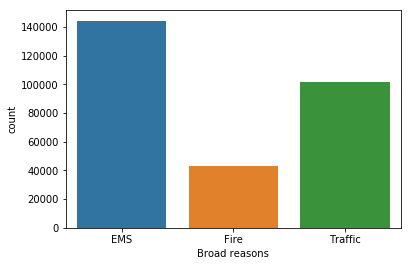

In [44]:
# Plot a Countplot for Broad Reasons
sns.countplot(x = 'Broad reasons',data = dataFrame)

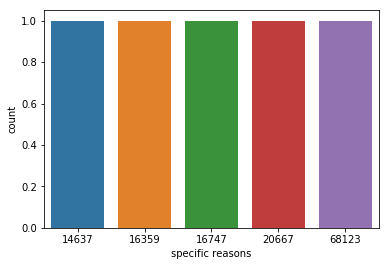

In [45]:
# Convert Object type to time stamp
dataFrame['timeStamp'] = pd.to_datetime(dataFrame['timeStamp'])

In [43]:
dataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289240 entries, 0 to 289239
Data columns (total 11 columns):
lat                 289240 non-null float64
lng                 289240 non-null float64
desc                289240 non-null object
zip                 253942 non-null float64
title               289240 non-null object
timeStamp           289240 non-null datetime64[ns]
twp                 289137 non-null object
addr                289240 non-null object
e                   289240 non-null int64
specific reasons    289240 non-null object
Broad reasons       289240 non-null object
dtypes: datetime64[ns](1), float64(3), int64(1), object(6)
memory usage: 24.3+ MB


In [47]:
# Create 3 cloumns of hours day and week.
dataFrame['Hour'] = dataFrame['timeStamp'].apply(lambda time: time.hour)

In [48]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific reasons,Broad reasons,Hour
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16


In [51]:
dataFrame['day'] = dataFrame['timeStamp'].apply(lambda time: time.day)

In [52]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific reasons,Broad reasons,Hour,day
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,10
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,10


In [53]:
dataFrame['week'] = dataFrame['timeStamp'].apply(lambda time: time.week)

In [54]:
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific reasons,Broad reasons,Hour,day,week
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,10,50
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,10,50
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,10,50
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,10,50
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,10,50


In [55]:
dataFrame['year'] = dataFrame['timeStamp'].apply(lambda time: time.year)
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific reasons,Broad reasons,Hour,day,week,year
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,10,50,2015
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,10,50,2015
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,10,50,2015
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,10,50,2015
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,10,50,2015


In [72]:
dataFrame['Month'] = dataFrame['timeStamp'].apply(lambda time: time.month)
dataFrame.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific reasons,Broad reasons,Hour,day,week,year,Month
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:10:52,NEW HANOVER,REINDEER CT & DEAD END,1,BACK PAINS/INJURY,EMS,17,10,50,2015,12
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:29:21,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,DIABETIC EMERGENCY,EMS,17,10,50,2015,12
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 14:39:21,NORRISTOWN,HAWS AVE,1,GAS-ODOR/LEAK,Fire,14,10,50,2015,12
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 16:47:36,NORRISTOWN,AIRY ST & SWEDE ST,1,CARDIAC EMERGENCY,EMS,16,10,50,2015,12
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 16:56:52,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1,DIZZINESS,EMS,16,10,50,2015,12


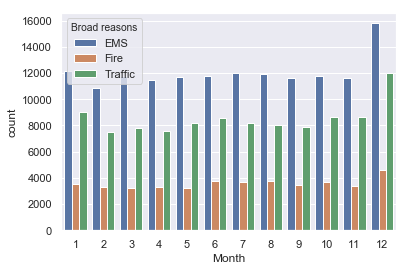

In [77]:
# Plot a Graph For Month
sns.countplot(x='Month',data=dataFrame,hue='Broad reasons')


In [79]:
# use Group_by method
bymonth = dataFrame.groupby('Month').count()

In [81]:
bymonth.head(12)

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,specific reasons,Broad reasons,Hour,day,week,year
Month,,,,,,,,,,,,,,,
1,24701,24701,24701,21877,24701,24701,24692,24701,24701,24701,24701,24701,24701,24701,24701
2,21663,21663,21663,19161,21663,21663,21658,21663,21663,21663,21663,21663,21663,21663,21663
3,22743,22743,22743,20160,22743,22743,22732,22743,22743,22743,22743,22743,22743,22743,22743
4,22343,22343,22343,19671,22343,22343,22336,22343,22343,22343,22343,22343,22343,22343,22343
5,23093,23093,23093,20254,23093,23093,23082,23093,23093,23093,23093,23093,23093,23093,23093
6,24065,24065,24065,21070,24065,24065,24058,24065,24065,24065,24065,24065,24065,24065,24065
7,23856,23856,23856,20940,23856,23856,23850,23856,23856,23856,23856,23856,23856,23856,23856
8,23657,23657,23657,20739,23657,23657,23646,23657,23657,23657,23657,23657,23657,23657,23657
9,23001,23001,23001,20014,23001,23001,22993,23001,23001,23001,23001,23001,23001,23001,23001


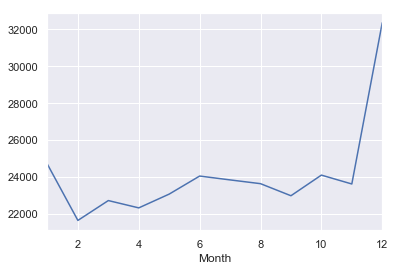

In [84]:
bymonth['twp'].plot()